In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# change resolution
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12

# Question 1

## graph 1 - time vs frequency

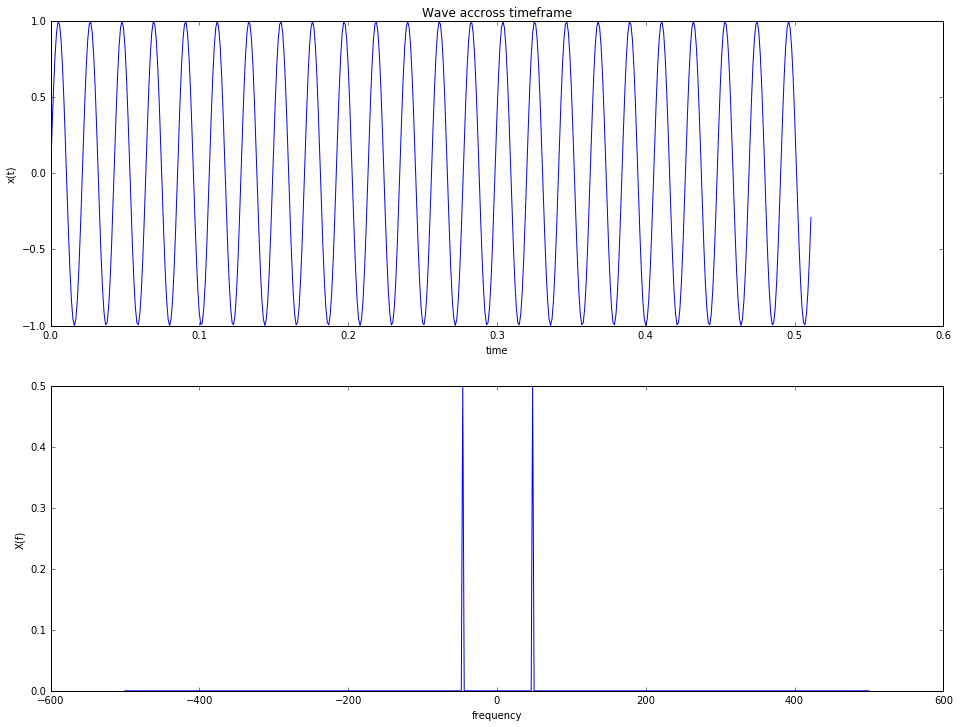

In [2]:
fs = float(1000) # Hz
N = 512
start_f0 = 46.875 
timeframe = np.arange(N) / fs

    
def get_fft(timeframe, wave):
    freq = np.linspace(-fs/2, fs/2, len(wave));
    strength = np.abs(np.fft.fftshift(np.fft.fft(wave))) / len(wave)
    return freq, strength


def plot_wave_and_fft(timeframe, wave):
    # FFT
    plt.subplot(2, 1, 1)
    plt.plot(timeframe, wave)
    plt.title('Wave accross timeframe')
    plt.xlabel('time')
    plt.ylabel('x(t)')

    freq, strength = get_fft(timeframe, wave)
    
    plt.subplot(2, 1, 2)
    plt.plot(freq, strength)
    plt.xlabel('frequency')
    plt.ylabel('X(f)')
    
    plt.show()

def q1(f0):
    w0 = 2 * math.pi * f0
    wave = np.sin(w0 * timeframe)
    plot_wave_and_fft(timeframe, wave)
    return wave, w0
    
wave, w0 = q1(start_f0)

# Question 2

## graph 2 - zero pad

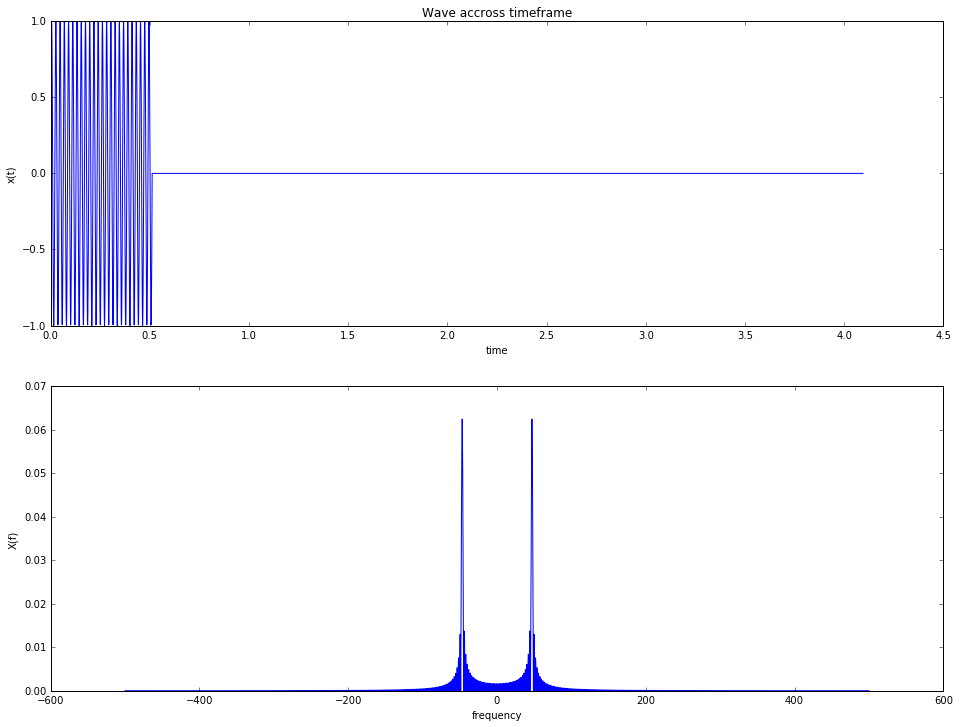

In [3]:
def q2(wave):
    N2 = 4096
    timeframe2 = np.arange(N2) / fs
    wave2 = np.append(wave, np.zeros(N2 - len(wave)))
    plot_wave_and_fft(timeframe2, wave2)
    
q2(wave)

# Question 3

## graph 3 - add noise

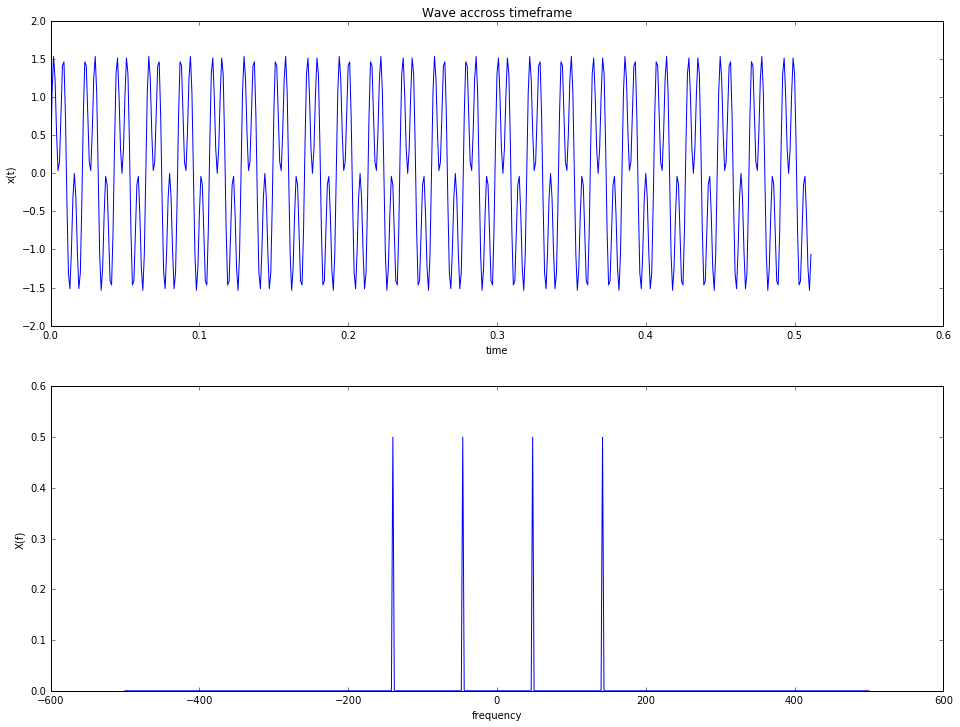

In [4]:
def q3(wave, w0):
    w1 = 3 * w0
    noise = np.sin(w1 * timeframe)
    wave_with_noise = wave + noise
    plot_wave_and_fft(timeframe, wave_with_noise)
    return wave_with_noise
    
wave_with_noise = q3(wave, w0)

## graph 4 - cancel noise

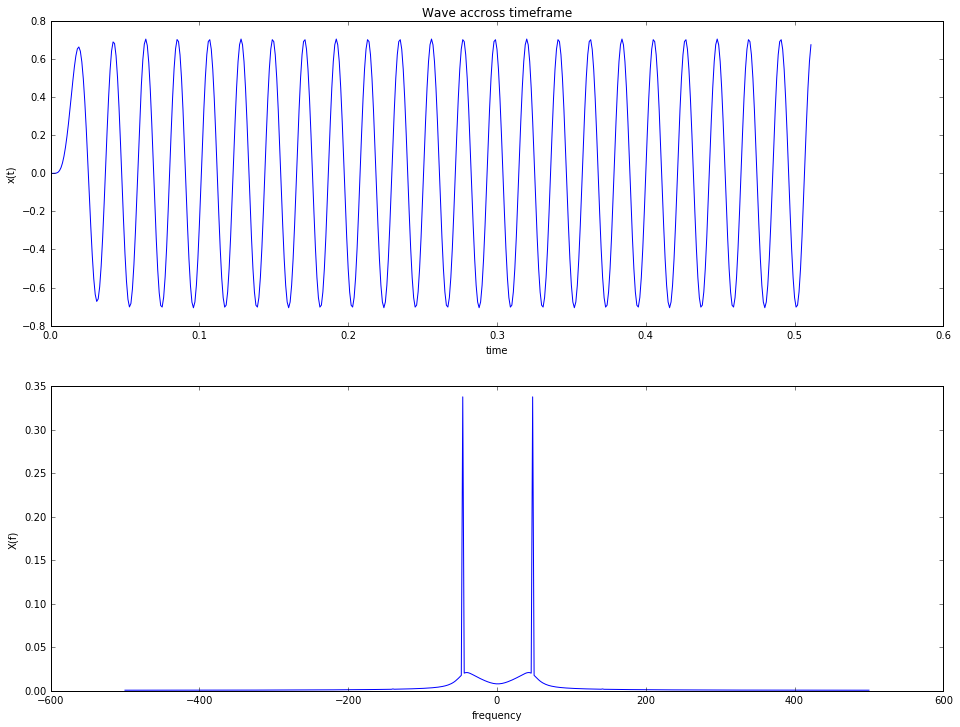

In [5]:
from scipy.signal import butter, lfilter

def q4(f0, wave_with_noise):
    b, a = butter(6, f0 / (fs / 2), btype='lowpass')
    filter_wave = lfilter(b, a, wave_with_noise)
    plot_wave_and_fft(timeframe, filter_wave)

q4(start_f0, wave_with_noise)

# Question 4

## graph 5 - zero sampling

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/numpy/core/numeric.py:460: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


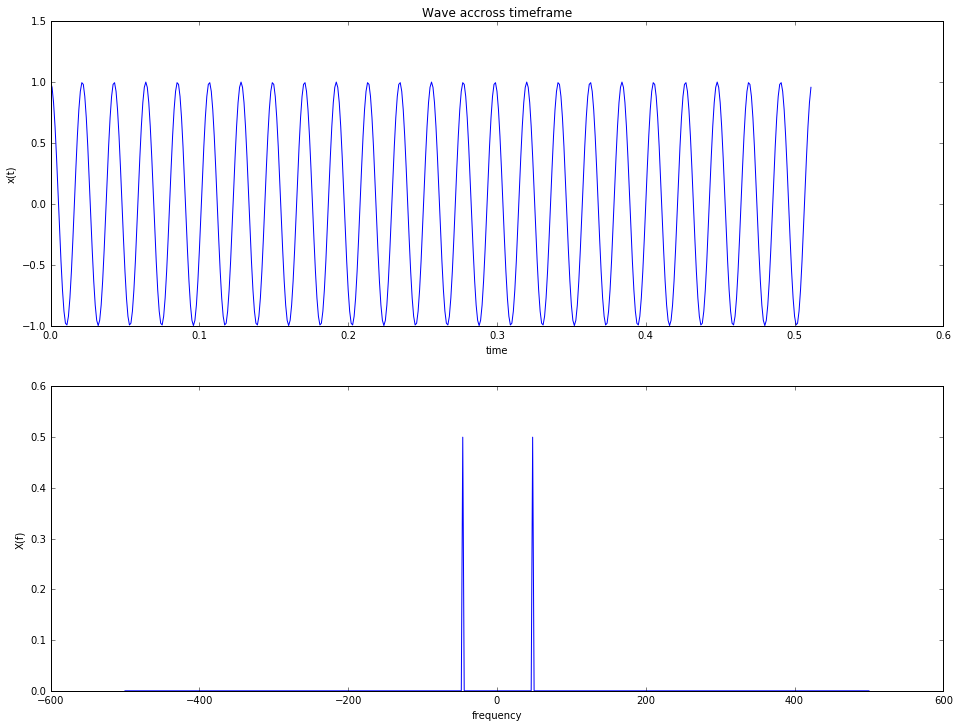

In [6]:
def q5(wave_with_noise, f0):
    f1 = 3 * f0
    freq, strength = get_fft(timeframe, wave_with_noise)
    # create 000000001111000000 (512 length) to keep the middle and remove the sides
    filter_out_noise = np.append(np.append(np.zeros(206), np.ones(100)), np.zeros(206))
    no_noise = filter_out_noise * strength
    no_noise_wave = np.fft.ifft(np.fft.ifftshift(no_noise * len(no_noise)))
    plot_wave_and_fft(timeframe, no_noise_wave)
    
q5(wave_with_noise, start_f0)

# Question 5

graph 6


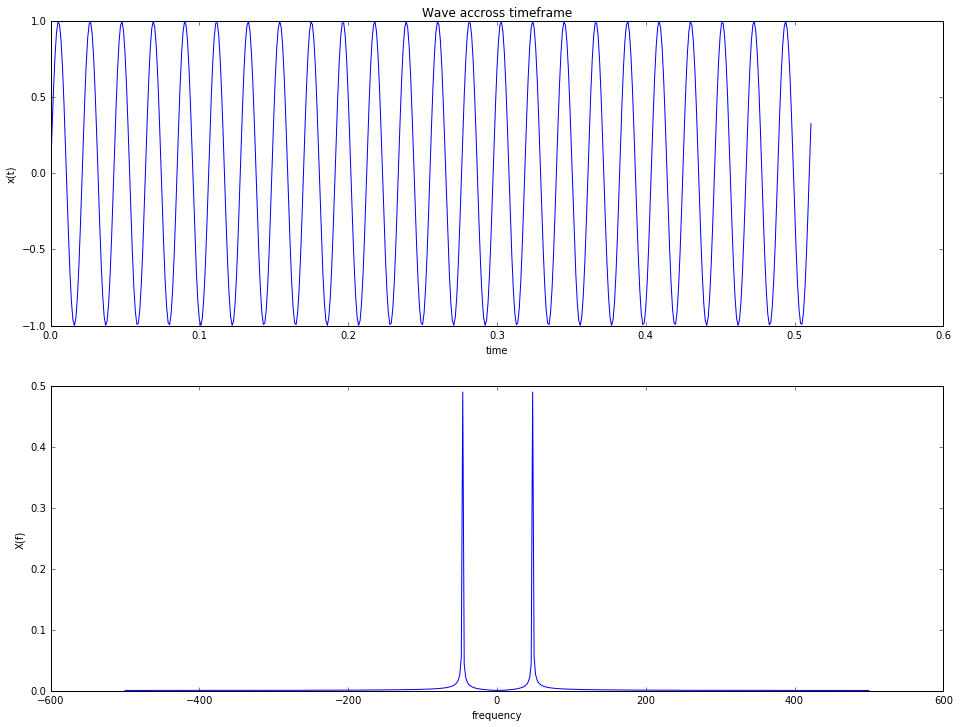

graph 7


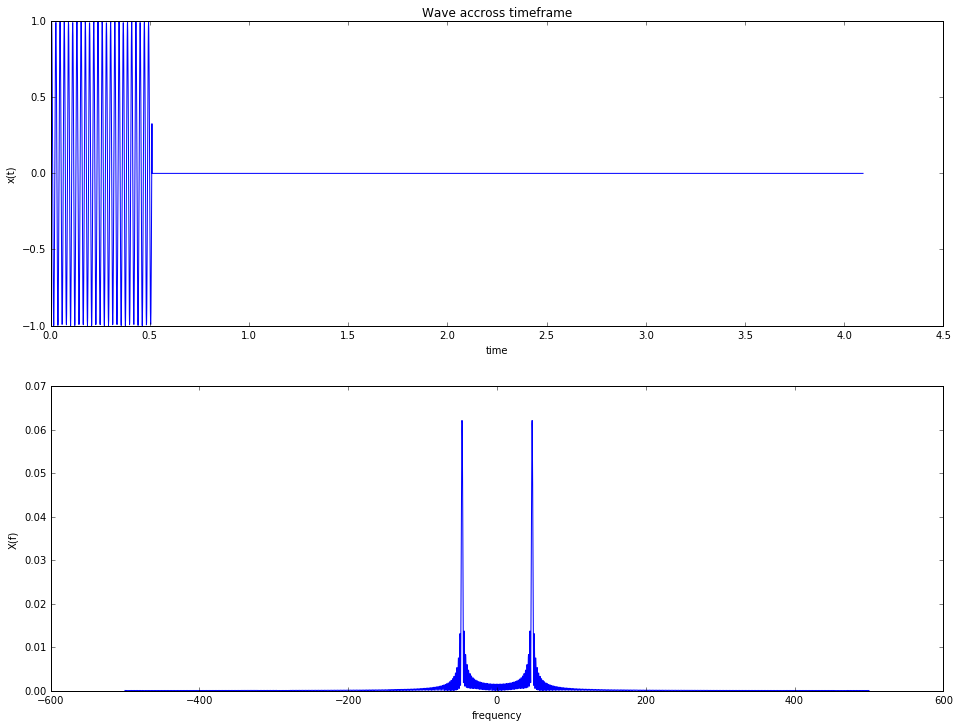

graph 8


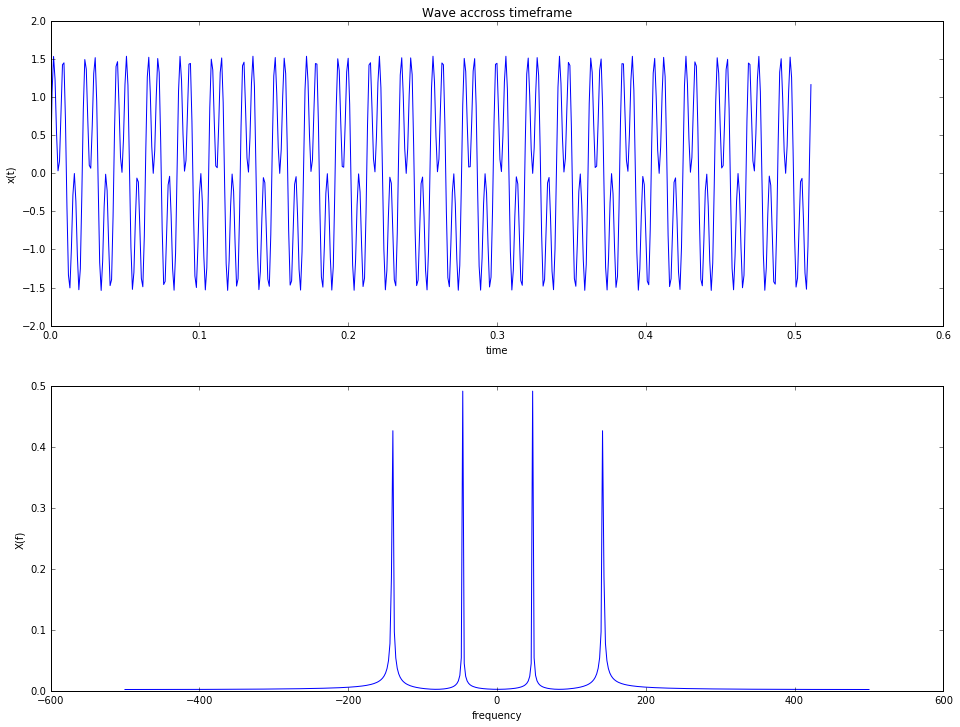

graph 9


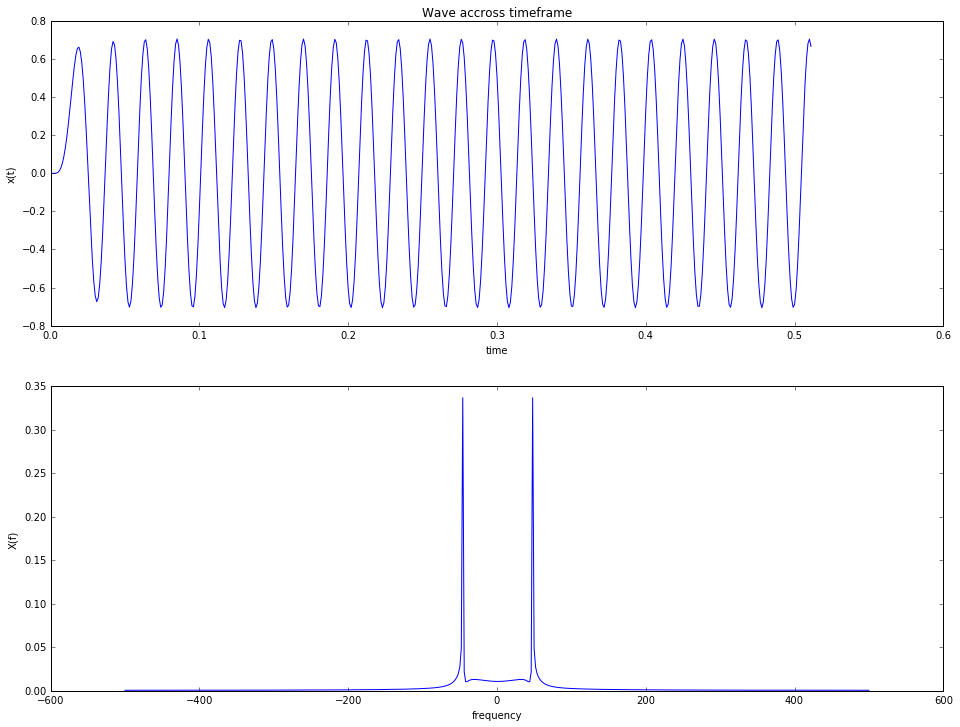

graph 10


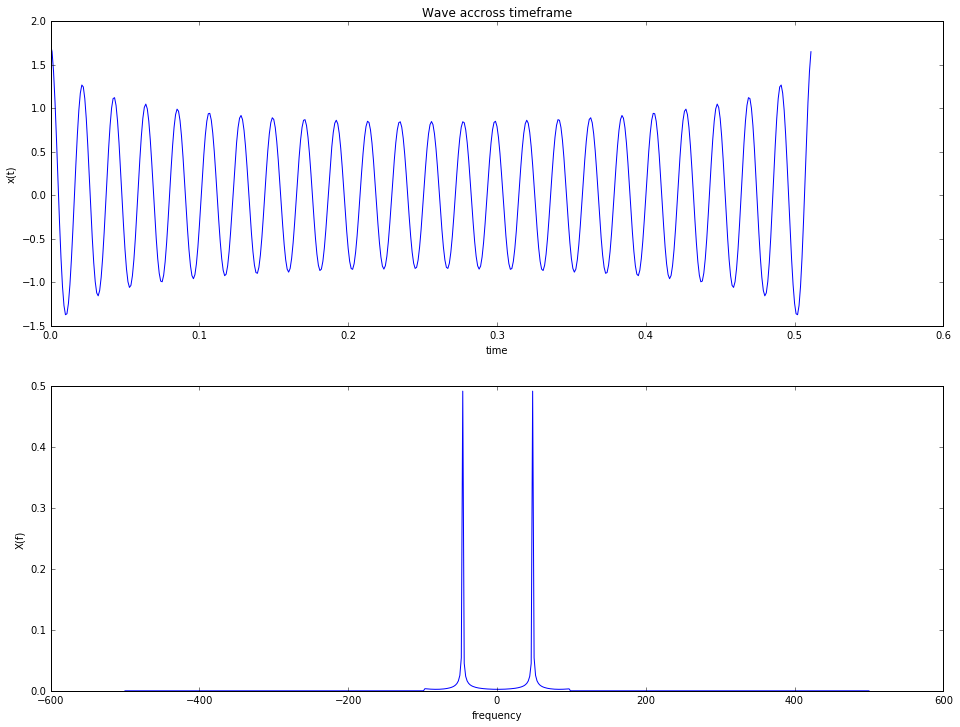

In [7]:
def new_f0():
    start_f0 = 47.0703
    print 'graph 6'
    wave, w0 = q1(start_f0)
    print 'graph 7'
    q2(wave)
    print 'graph 8'
    wave_with_noise = q3(wave, w0)
    print 'graph 9'
    q4(start_f0, wave_with_noise)
    print 'graph 10'
    q5(wave_with_noise, start_f0)
    
new_f0()